### Bike Sharing Demand
Forecast use of a city bikeshare system

https://www.kaggle.com/c/bike-sharing-demand/overview

### 1. Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

### 2. Data loading

  * **datetime** - 시간. 연-월-일 시:분:초 로 표현합니다. (가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초)
  * **season** - 계절. 봄(1), 여름(2), 가을(3), 겨울(4) 순으로 표현합니다.
  * **holiday** - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아닙니다.
  * **workingday** - 근무일. 1이면 근무일이며, 0이면 근무일이 아닙니다.
  * **weather** - 날씨. 1 ~ 4 사이의 값을 가지며, 구체적으로는 다음과 같습니다.
    * 1: 아주 깨끗한 날씨입니다. 또는 아주 약간의 구름이 끼어있습니다.
    * 2: 약간의 안개와 구름이 끼어있는 날씨입니다.
    * 3: 약간의 눈, 비가 오거나 천둥이 칩니다.
    * 4: 아주 많은 비가 오거나 우박이 내립니다.
  * **temp** - 온도. 섭씨(Celsius)로 적혀있습니다.
  * **atemp** - 체감 온도. 마찬가지로 섭씨(Celsius)로 적혀있습니다.
  * **humidity** - 습도.
  * **windspeed** - 풍속.
  * **casual** - 비회원(non-registered)의 자전거 대여량.
  * **registered** - 회원(registered)의 자전거 대여량.
  * **count** - 총 자전거 대여랑. 비회원(casual) + 회원(registered)과 동일합니다.

In [3]:
train = pd.read_csv("train.csv")

print(train.shape)
train.head(2)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [4]:
test = pd.read_csv("test.csv")

print(test.shape)
test.head(1)

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027


In [5]:
submission = pd.read_csv("sampleSubmission.csv")

print(submission.shape)
submission.head(1)

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0


### 3. Preprocessing
#### 3-1) missing values

In [6]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


#### 3-2) target(label) distribution (data transformation)

In [8]:
from scipy.stats import norm

<AxesSubplot:xlabel='count', ylabel='Density'>

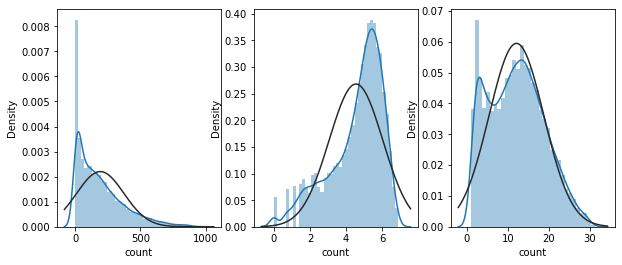

In [9]:
figure, (a1,a2,a3) = plt.subplots(1,3)
figure.set_size_inches(10,4)

sns.distplot(train['count'], ax=a1, fit=norm)
sns.distplot(np.log(train['count']), ax=a2, fit=norm)
sns.distplot(np.sqrt(train['count']), ax=a3, fit=norm)

In [10]:
train['log_count'] = np.log(train['count'])

#### 3-3) datetime

In [11]:
train["yy"] = pd.to_datetime(train["datetime"]).dt.year
train["mm"] = pd.to_datetime(train["datetime"]).dt.month
train["dd"] = pd.to_datetime(train["datetime"]).dt.day
train["h"] = pd.to_datetime(train["datetime"]).dt.hour
train["m"] = pd.to_datetime(train["datetime"]).dt.minute
train["s"] = pd.to_datetime(train["datetime"]).dt.second
train["dw"] = pd.to_datetime(train["datetime"]).dt.dayofweek
train["wy"] = pd.to_datetime(train["datetime"]).dt.isocalendar().week   #OLD : dt.weekofyear

train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,log_count,yy,mm,dd,h,m,s,dw,wy
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,16,2.772589,2011,1,1,0,0,0,5,52
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,40,3.688879,2011,1,1,1,0,0,5,52


In [12]:
test["yy"] = pd.to_datetime(test["datetime"]).dt.year
test["mm"] = pd.to_datetime(test["datetime"]).dt.month
test["dd"] = pd.to_datetime(test["datetime"]).dt.day
test["h"] = pd.to_datetime(test["datetime"]).dt.hour
test["m"] = pd.to_datetime(test["datetime"]).dt.minute
test["s"] = pd.to_datetime(test["datetime"]).dt.second
test["dw"] = pd.to_datetime(test["datetime"]).dt.dayofweek
test["wy"] = pd.to_datetime(test["datetime"]).dt.isocalendar().week   #OLD : dt.weekofyear

test.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,yy,mm,dd,h,m,s,dw,wy
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3,3


### 4. Analysis
#### 4-1) Visualization

<AxesSubplot:xlabel='wy', ylabel='count'>

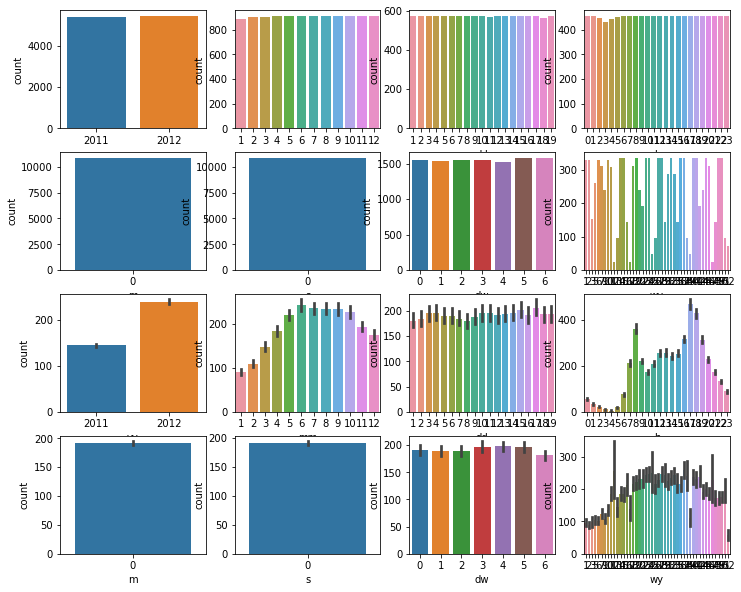

In [13]:
figure, ax = plt.subplots(4,4)
figure.set_size_inches(12,10)

# x (feature)의 형태 파악
sns.countplot(data=train, x='yy', ax=ax[0,0])
sns.countplot(data=train, x='mm', ax=ax[0,1])
sns.countplot(data=train, x='dd', ax=ax[0,2])
sns.countplot(data=train, x='h', ax=ax[0,3])
sns.countplot(data=train, x='m', ax=ax[1,0])
sns.countplot(data=train, x='s', ax=ax[1,1])
sns.countplot(data=train, x='dw', ax=ax[1,2])
sns.countplot(data=train, x='wy', ax=ax[1,3])

# x,y 사이의 관계를 추론해보는 것이 중요
sns.barplot(data=train, x='yy', y='count', ax=ax[2,0])
sns.barplot(data=train, x='mm', y='count', ax=ax[2,1])
sns.barplot(data=train, x='dd', y='count', ax=ax[2,2])
sns.barplot(data=train, x='h', y='count', ax=ax[2,3])
sns.barplot(data=train, x='m', y='count', ax=ax[3,0])
sns.barplot(data=train, x='s', y='count', ax=ax[3,1])
sns.barplot(data=train, x='dw', y='count', ax=ax[3,2])
sns.barplot(data=train, x='wy', y='count', ax=ax[3,3])

<AxesSubplot:xlabel='wy', ylabel='count'>

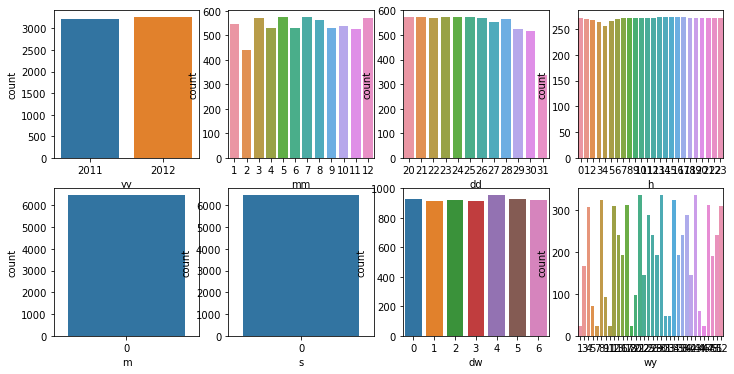

In [14]:
figure, ax = plt.subplots(2,4)
figure.set_size_inches(12,6)

sns.countplot(data=test, x='yy', ax=ax[0,0])
sns.countplot(data=test, x='mm', ax=ax[0,1])
sns.countplot(data=test, x='dd', ax=ax[0,2])
sns.countplot(data=test, x='h', ax=ax[0,3])
sns.countplot(data=test, x='m', ax=ax[1,0])
sns.countplot(data=test, x='s', ax=ax[1,1])
sns.countplot(data=test, x='dw', ax=ax[1,2])
sns.countplot(data=test, x='wy', ax=ax[1,3])

<AxesSubplot:xlabel='yymm', ylabel='count'>

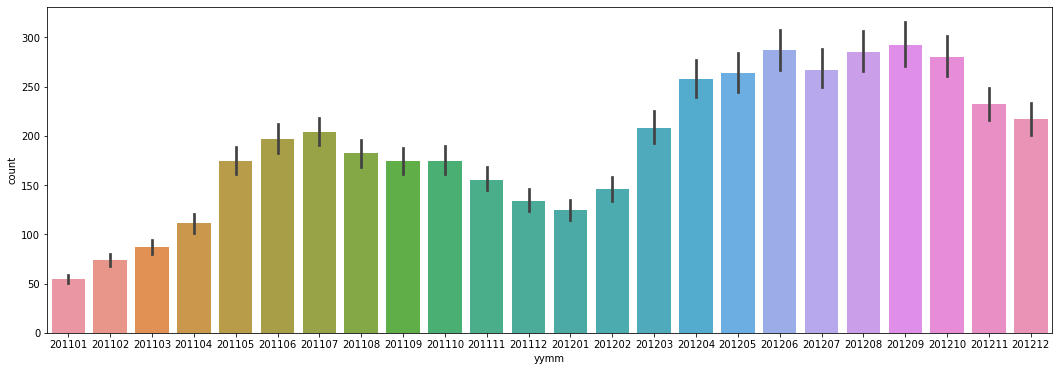

In [64]:
# year + month :
train["yymm"] = train["yy"].astype(str) + train["mm"].astype(str).str.zfill(2)

plt.figure(figsize=(18,6))
sns.barplot(data=train, x='yymm', y='count')

<AxesSubplot:xlabel='h', ylabel='count'>

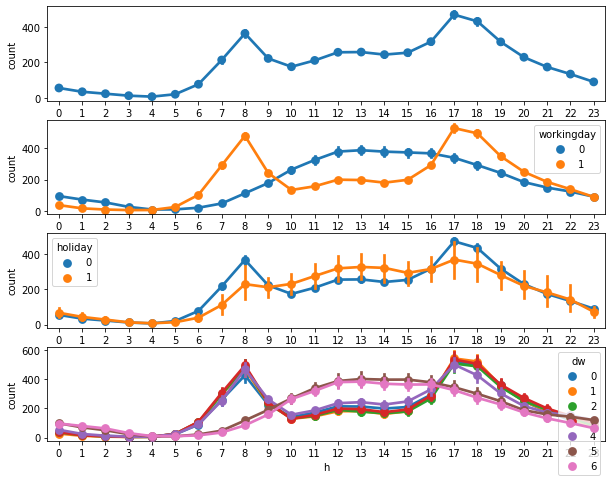

In [16]:
# hour
figure, (a1,a2,a3,a4) = plt.subplots(4,1)
figure.set_size_inches(10,8)

sns.pointplot(data=train, x='h', y='count', ax=a1)
sns.pointplot(data=train, x='h', y='count', hue="workingday", ax=a2)
sns.pointplot(data=train, x='h', y='count', hue="holiday", ax=a3)
sns.pointplot(data=train, x='h', y='count', hue="dw", ax=a4)

In [17]:
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,log_count,yy,mm,dd,h,m,s,dw,wy,yymm
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,2.772589,2011,1,1,0,0,0,5,52,201101


In [18]:
# 불쾌지수를 data에 파생변수로 만든 것 (파생변수가 많으면 많을수록 좋음)
train["d_idx"] = (9/5) * train["temp"] - 0.55 * (1-train["humidity"]/100) * ((9/5) * train["temp"] - 26) + 32

In [19]:
test["d_idx"] = (9/5) * test["temp"] - 0.55 * (1-test["humidity"]/100) * ((9/5) * test["temp"] - 26) + 32

<AxesSubplot:xlabel='d_idx', ylabel='count'>

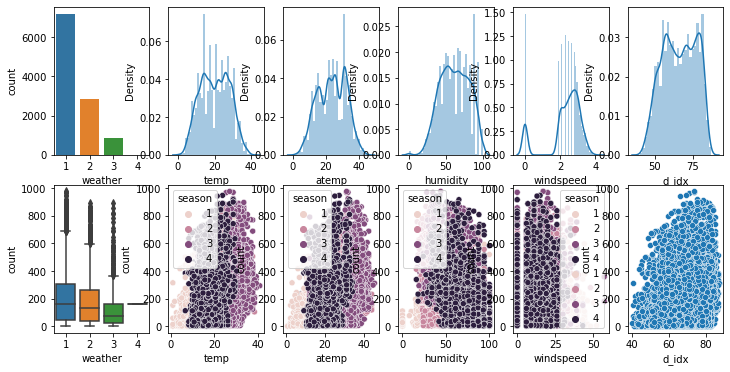

In [20]:
# weather,temp,atemp,humidity,windspeed

figure, ax = plt.subplots(2,6)
figure.set_size_inches(12,6)

sns.countplot(data=train, x='weather', ax=ax[0,0])
sns.distplot(train['temp'], ax=ax[0,1])
sns.distplot(train['atemp'], ax=ax[0,2])
sns.distplot(train['humidity'], ax=ax[0,3])
sns.distplot(np.log(train['windspeed']+1), ax=ax[0,4])
sns.distplot(train['d_idx'], ax=ax[0,5])

sns.boxplot(data=train, x='weather', y='count', ax=ax[1,0])
sns.scatterplot(data=train, x='temp', y='count', ax=ax[1,1], hue='season')
sns.scatterplot(data=train, x='atemp', y='count', ax=ax[1,2], hue='season')
sns.scatterplot(data=train, x='humidity', y='count', ax=ax[1,3], hue='season')
sns.scatterplot(data=train, x='windspeed', y='count', ax=ax[1,4], hue='season')
sns.scatterplot(data=train, x='windspeed', y='count', ax=ax[1,4], hue='season')
sns.scatterplot(data=train, x='d_idx', y='count', ax=ax[1,5])

In [21]:
# 범위가 큰 값들을 0~1 사이의 범위로 바꿔주는 작업
from sklearn.preprocessing import MinMaxScaler

In [22]:
mm_scaler = MinMaxScaler()

In [23]:
m_col = "temp,atemp,humidity,windspeed,d_idx".split(",")
train[m_col].head(3)

,temp,atemp,humidity,windspeed,d_idx
0,9.84,14.395,81,0.0,50.578096
1,9.02,13.635,80,0.0,49.310040
2,9.02,13.635,80,0.0,49.310040


In [24]:
df_scale = pd.DataFrame(mm_scaler.fit_transform(train[m_col]), columns=["m_temp","m_atemp","m_hum","m_wind","m_idx"])

In [25]:
train = pd.concat([train, df_scale], axis=1)
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,s,dw,wy,yymm,d_idx,m_temp,m_atemp,m_hum,m_wind,m_idx
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,5,52,201101,50.578096,0.224490,0.305068,0.81,0.0,0.221046
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0,5,52,201101,49.310040,0.204082,0.288064,0.80,0.0,0.193972
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0,5,52,201101,49.310040,0.204082,0.288064,0.80,0.0,0.193972


In [26]:
## For test dataset :

df_scale = pd.DataFrame(mm_scaler.fit_transform(test[m_col]), columns=["m_temp","m_atemp","m_hum","m_wind","m_idx"])
test = pd.concat([test, df_scale], axis=1)
test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,yy,...,m,s,dw,wy,d_idx,m_temp,m_atemp,m_hum,m_wind,m_idx
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,...,0,0,3,3,52.836504,0.25,0.2273,0.47619,0.464346,0.276838
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,3,3,52.836504,0.25,0.2727,0.47619,0.000000,0.276838
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,3,3,52.836504,0.25,0.2727,0.47619,0.000000,0.276838


<AxesSubplot:xlabel='m_idx', ylabel='count'>

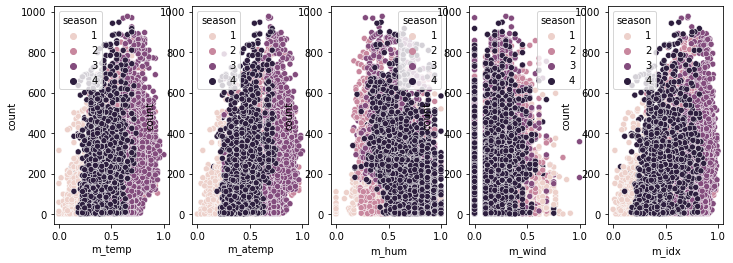

In [27]:
figure, (a1,a2,a3,a4,a5) = plt.subplots(1,5)
figure.set_size_inches(12,4)

sns.scatterplot(data=train, x='m_temp', y='count', ax=a1, hue='season')
sns.scatterplot(data=train, x='m_atemp', y='count', ax=a2, hue='season')
sns.scatterplot(data=train, x='m_hum', y='count', ax=a3, hue='season')
sns.scatterplot(data=train, x='m_wind', y='count', ax=a4, hue='season')
sns.scatterplot(data=train, x='m_idx', y='count', ax=a5, hue='season')

In [28]:
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,s,dw,wy,yymm,d_idx,m_temp,m_atemp,m_hum,m_wind,m_idx
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,5,52,201101,50.578096,0.22449,0.305068,0.81,0.0,0.221046


### 5. Modeling
#### 5-1) Feature selection 

In [29]:
train.head(1)
train.columns
# 숫자, boolean만 가능

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'log_count', 'yy', 'mm', 'dd', 'h', 'm', 's', 'dw', 'wy', 'yymm',
       'd_idx', 'm_temp', 'm_atemp', 'm_hum', 'm_wind', 'm_idx'],
      dtype='object')

In [30]:
# 가장 impact가 큰 정보들 부터 채택

# RF
f_names = [#'season', 'holiday', 
           'workingday', #'weather', 
#            'temp','atemp', 'humidity', 'windspeed', 
#            'casual', 'registered', 'count', 'log_count', 
           'yy', 'mm', 'h', 'dw', 'wy', #'d_idx',
           'm_temp', 'm_atemp', 'm_hum', #'m_wind', 
           'm_idx']

# # GB
# f_names = [#'season', 'holiday', 
#            'workingday', #'weather', 
# #            'temp','atemp', 'humidity', 'windspeed', 
# #            'casual', 'registered', 'count', 'log_count', 
#            'yy', 'mm', 'h', 'dw', #'wy', #'d_idx',
#            'm_temp', #'m_atemp', 
#            'm_hum', #'m_wind', 
#            'm_idx']

In [31]:
X_train = train[f_names]
y_train = train['log_count'] #train['count']

In [32]:
X_test = test[f_names]

#### 5-2) Model : RandomForest

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rf_reg = RandomForestRegressor(random_state=45)

# rf_reg = RandomForestRegressor(min_samples_leaf=140, min_samples_split=150,
#                                n_estimators=120, random_state=45)

In [35]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=45)

In [36]:
pred = rf_reg.predict(X_test)
pred = np.exp(pred)

In [37]:
pd.DataFrame(rf_reg.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)

,0
h,0.755874
m_idx,0.045944
workingday,0.039052
yy,0.030476
dw,0.029944
wy,0.025955
mm,0.023819
m_hum,0.023654
m_temp,0.013391
m_atemp,0.011890


#### 5-3) Model : GradientBoost

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

In [39]:
gb_reg = GradientBoostingRegressor(random_state=45)

In [40]:
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=45)

In [41]:
pred = gb_reg.predict(X_test)
pred = np.exp(pred)

In [42]:
pd.DataFrame(gb_reg.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)

,0
h,0.795933
workingday,0.038813
yy,0.034319
mm,0.034133
m_idx,0.027883
dw,0.023977
m_hum,0.017800
m_temp,0.013117
wy,0.008527
m_atemp,0.005498


### 6. Tuning

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
params = {
    "n_estimators" : [120,130,150],
#     "criterion" : ["mse", "mae"],
#     "max_depth" : [None,10,20],
    "min_samples_split" : [150,170,190],
    "min_samples_leaf" : [140,143,145]
}

In [45]:
rf_reg_grid = RandomForestRegressor(random_state=45)

In [46]:
grid_rf_reg = GridSearchCV(rf_reg_grid, param_grid=params, n_jobs=-1, verbose=1)

In [47]:
grid_rf_reg.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(estimator=RandomForestRegressor(random_state=45), n_jobs=-1,
             param_grid={'min_samples_leaf': [140, 143, 145],
                         'min_samples_split': [150, 170, 190],
                         'n_estimators': [120, 130, 150]},
             verbose=1)

In [48]:
print(grid_rf_reg.best_score_)
print(grid_rf_reg.best_estimator_)

0.7161979571969562
RandomForestRegressor(min_samples_leaf=140, min_samples_split=150,
                      n_estimators=120, random_state=45)


#### Validation

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

In [50]:
X_fit, X_val, y_fit, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=45,
                                             shuffle=False)

In [51]:
rf_reg.fit(X_fit, y_fit)

RandomForestRegressor(random_state=45)

In [52]:
gb_reg.fit(X_fit, y_fit)

GradientBoostingRegressor(random_state=45)

In [53]:
pred = rf_reg.predict(X_val)
pred = np.exp(pred)

In [54]:
pred = gb_reg.predict(X_val)
pred = np.exp(pred)

In [55]:
np.sqrt(mean_squared_log_error(y_val, pred))

# RF
# 3.208 ->  0.46395  
# GB
# 3.22  ->  0.52588

3.216149800064112

##### "n_estimators" : 

In [56]:
lst_hp = range(100,500,50)
lst_log = []

for hp in lst_hp:
    
    rf_reg_tun = RandomForestRegressor(n_estimators=hp, random_state=45)
    
    rf_reg_tun.fit(X_fit, y_fit)
    pred_fit = np.exp(rf_reg_tun.predict(X_fit))
    pred_val = np.exp(rf_reg_tun.predict(X_val))
    
    score_fit = np.sqrt(mean_squared_log_error(y_fit, pred_fit))
    score_val = np.sqrt(mean_squared_log_error(y_val, pred_val))
    
    print(f"n_estimators = {hp}, score(fit) = {score_fit}, score(val) = {score_val}")
    lst_log.append({
        'n_estimators' : hp,
        'score(train)' : score_fit,
        'score(test)' : score_val
    }
    )
    
df_log = pd.DataFrame(lst_log)    

n_estimators = 100, score(fit) = 3.0405458514459736, score(val) = 3.208035948392101
n_estimators = 150, score(fit) = 3.040706590001807, score(val) = 3.2025334327631527
n_estimators = 200, score(fit) = 3.0405152046954096, score(val) = 3.20161155491788
n_estimators = 250, score(fit) = 3.040459901137261, score(val) = 3.200263843315365
n_estimators = 300, score(fit) = 3.0404086766394642, score(val) = 3.197390250631558
n_estimators = 350, score(fit) = 3.0404456255389927, score(val) = 3.197952252945122
n_estimators = 400, score(fit) = 3.0404157282193665, score(val) = 3.1974219835661706
n_estimators = 450, score(fit) = 3.040393694879046, score(val) = 3.197668055472241


No handles with labels found to put in legend.


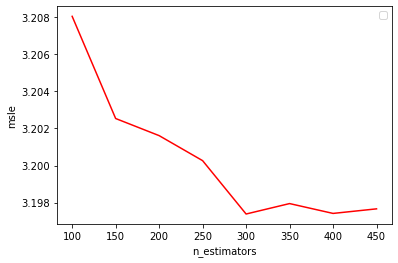

In [57]:
# plt.plot(df_log['n_estimators'], df_log["score(train)"], color='b')
plt.plot(df_log['n_estimators'], df_log["score(test)"], color='r')
plt.xlabel("n_estimators")
plt.ylabel("msle")
plt.legend()

##### "min_samples_leaf" :

In [58]:
lst_hp = range(110,150,1)
lst_log = []

for hp in lst_hp:
    
    rf_reg_tun = RandomForestRegressor(min_samples_leaf=hp, random_state=45)
    
    rf_reg_tun.fit(X_fit, y_fit)
    pred_fit = np.exp(rf_reg_tun.predict(X_fit))
    pred_val = np.exp(rf_reg_tun.predict(X_val))
    
    score_fit = np.sqrt(mean_squared_log_error(y_fit, pred_fit))
    score_val = np.sqrt(mean_squared_log_error(y_val, pred_val))
    
    print(f"min_samples_leaf = {hp}, score(fit) = {score_fit}, score(val) = {score_val}")
    lst_log.append({
        'min_samples_leaf' : hp,
        'score(train)' : score_fit,
        'score(test)' : score_val
    }
    )
    
df_log = pd.DataFrame(lst_log)   

min_samples_leaf = 110, score(fit) = 3.004092594736646, score(val) = 3.1344600226917922
min_samples_leaf = 111, score(fit) = 3.0039754686782985, score(val) = 3.134114425916104
min_samples_leaf = 112, score(fit) = 3.0037715508845566, score(val) = 3.13298441635451
min_samples_leaf = 113, score(fit) = 3.003638768529932, score(val) = 3.1328866118179843
min_samples_leaf = 114, score(fit) = 3.003489720735584, score(val) = 3.132502934729373
min_samples_leaf = 115, score(fit) = 3.0033635313485867, score(val) = 3.132245770755528
min_samples_leaf = 116, score(fit) = 3.003211182457413, score(val) = 3.1318707073619474
min_samples_leaf = 117, score(fit) = 3.003050076282524, score(val) = 3.1310001373592495
min_samples_leaf = 118, score(fit) = 3.0028887261993713, score(val) = 3.1311385006036137
min_samples_leaf = 119, score(fit) = 3.0027545570090837, score(val) = 3.131528669072834
min_samples_leaf = 120, score(fit) = 3.0026315911327646, score(val) = 3.1309214751761814
min_samples_leaf = 121, score(fi

No handles with labels found to put in legend.


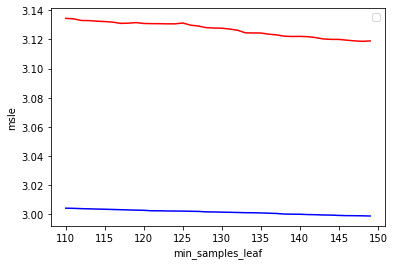

In [59]:
plt.plot(df_log['min_samples_leaf'], df_log["score(train)"], color='b')
plt.plot(df_log['min_samples_leaf'], df_log["score(test)"], color='r')
plt.xlabel("min_samples_leaf")
plt.ylabel("msle")
plt.legend()

##### min_samples_split

In [60]:
lst_hp = range(150,200,10)
lst_log = []

for hp in lst_hp:
    
    rf_reg_tun = RandomForestRegressor(min_samples_split=hp, random_state=45)
    
    rf_reg_tun.fit(X_fit, y_fit)
    pred_fit = np.exp(rf_reg_tun.predict(X_fit))
    pred_val = np.exp(rf_reg_tun.predict(X_val))
    
    score_fit = np.sqrt(mean_squared_log_error(y_fit, pred_fit))
    score_val = np.sqrt(mean_squared_log_error(y_val, pred_val))
    
    print(f"min_samples_split = {hp}, score(fit) = {score_fit}, score(val) = {score_val}")
    lst_log.append({
        'min_samples_split' : hp,
        'score(train)' : score_fit,
        'score(test)' : score_val
    }
    )
    
df_log = pd.DataFrame(lst_log)   

min_samples_split = 150, score(fit) = 3.0140313148324815, score(val) = 3.133158075777488
min_samples_split = 160, score(fit) = 3.0132143119556294, score(val) = 3.1299549502882567
min_samples_split = 170, score(fit) = 3.01234045931649, score(val) = 3.1278722830407237
min_samples_split = 180, score(fit) = 3.0116822071324933, score(val) = 3.126185277840161
min_samples_split = 190, score(fit) = 3.0110051685201156, score(val) = 3.1255423980741788


No handles with labels found to put in legend.


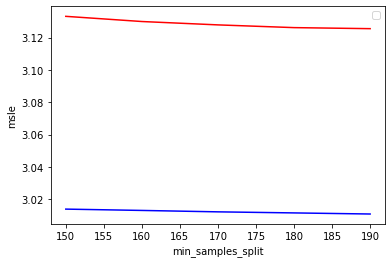

In [61]:
plt.plot(df_log['min_samples_split'], df_log["score(train)"], color='b')
plt.plot(df_log['min_samples_split'], df_log["score(test)"], color='r')
plt.xlabel("min_samples_split")
plt.ylabel("msle")
plt.legend()

In [62]:
RandomForestRegressor(A = 200, random_state=45)

    n_estimators=100,
    *,
    criterion='mse',
    max_depth=None,
    min_samples_split=,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None

IndentationError: unexpected indent (955020327.py, line 3)

### 7. Submission

In [ ]:
submission.head(1)

In [ ]:
submission['count'] = pred
submission.head(3)

In [ ]:
submission.to_csv("kaggle-bike-220222_1440.csv", index=False)